In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [ ]:
# Step 1: Read the CSV file
csv_file_path = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\vis\visFreq.csv'  # Replace this with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Step 2: Multiply every element by a factor
factor = 1e6  # Replace this with your desired factor
df = df * factor

# Step 3: Save the updated DataFrame back to the original CSV
df.to_csv(csv_file_path, index=False)

#### Splitting Data By Scan Time

In [29]:
def timeString(fileName):
    return '_'.join(fileName.split('-')[2:]).replace('.csv','').split('_')

scanPath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\save\data'
files = [f for f in os.listdir(scanPath)]
times = [timeString(name) for name in files]

In [36]:
times

[['08', '15', '40', '32'],
 ['08', '15', '44', '07'],
 ['08', '15', '47', '43'],
 ['08', '15', '51', '18'],
 ['08', '15', '54', '53'],
 ['08', '15', '58', '26'],
 ['08', '16', '01', '59'],
 ['08', '16', '05', '32'],
 ['08', '16', '09', '07'],
 ['08', '16', '12', '41'],
 ['08', '16', '16', '16'],
 ['08', '16', '19', '50'],
 ['08', '16', '23', '25'],
 ['08', '16', '26', '59'],
 ['08', '16', '30', '34'],
 ['08', '16', '34', '09'],
 ['08', '16', '37', '46'],
 ['08', '16', '41', '20'],
 ['08', '16', '44', '55'],
 ['08', '16', '48', '31'],
 ['08', '16', '52', '08'],
 ['08', '16', '55', '43'],
 ['08', '16', '59', '19'],
 ['08', '17', '02', '54'],
 ['08', '17', '06', '30'],
 ['08', '17', '10', '05'],
 ['08', '17', '13', '41'],
 ['08', '17', '17', '17'],
 ['08', '17', '20', '52'],
 ['08', '17', '24', '28'],
 ['08', '17', '28', '04'],
 ['08', '17', '31', '40'],
 ['08', '17', '35', '17'],
 ['08', '17', '38', '54'],
 ['08', '17', '42', '29'],
 ['08', '17', '46', '04'],
 ['08', '17', '49', '40'],
 

In [45]:
splitIndices = []

for i in range(len(times)-1):
    time1=times[i]; time2=times[i+1]
    
    if ((int(time2[0])*1440 + int(time2[1])*60 + int(time2[2]) + int(time2[3])/60) -
        (int(time1[0])*1440 + int(time1[1])*60 + int(time1[2]) + int(time1[3])/60)
        < 1
       ):
        splitIndices.append(i)

[files[i] for i in splitIndices]

['exclusionLine_2024-03-08_21-42-33.csv',
 'exclusionLine_2024-03-09_03-50-33.csv',
 'exclusionLine_2024-03-09_10-08-32.csv',
 'exclusionLine_2024-03-09_16-35-19.csv']

# Processing The 3/7 Run

In [110]:
runData = {}
metrics = {}

In [122]:
runPath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\runs'
runs = [f for f in os.listdir(runPath)]

for run in runs:
    dataPath = runPath + '\\' + run + r'\data'
    runData[run] = [np.loadtxt(os.path.join(dataPath, file), delimiter=",") for file in os.listdir(dataPath)]

In [111]:
dynamicDataPath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\runs\dynamic\data'
runData['dynamic'] = [np.loadtxt(os.path.join(dynamicDataPath, file), delimiter=",") for file in os.listdir(dynamicDataPath)]

dynamicMetricPath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\runs\dynamic\metrics'
metrics['dynamic'] = [np.loadtxt(os.path.join(dynamicMetricPath, file), delimiter=",") for file in os.listdir(dynamicMetricPath)]

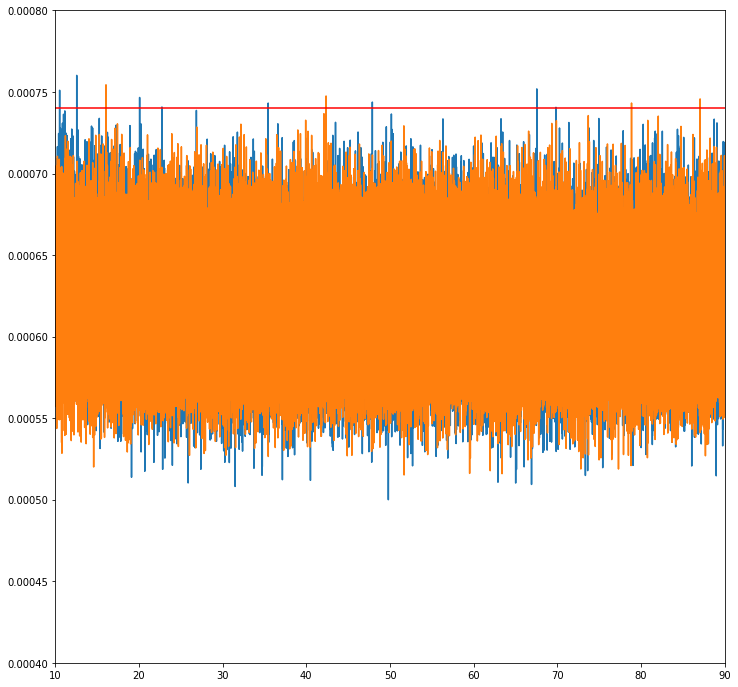

In [126]:
target = 7.4e-4
plt.figure(figsize=(12,12))

for line in [runData['dynamic'][-1], runData['21'][-1]]:
    plt.plot(line[1], line[0])
    
    
plt.axhline(y=target, color="r", linestyle="-", label="Target Exclusion")
    
plt.ylim([4e-4,8e-4])
plt.xlim([10,90])

plt.show()

In [121]:
finalMetrics = metrics['dynamic'][-1]

# Slice center 90% (20-100 MHz)
startIndex = int(0.1 * len(finalMetrics))
endIndex = int(0.9 * len(finalMetrics))

finalMetrics = finalMetrics[startIndex:endIndex]

np.mean(finalMetrics)

2096.7425

In [117]:
metrics['dynamic']

[array(2200.),
 array([2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200.]),
 array([2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200.]),
 array([2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200., 1936., 1950., 1945., 1953.,
        1955., 1932., 1928., 2200.]),
 array([2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200., 1936., 1950., 1945., 1953.,
        1955., 1932., 1928., 2200., 1990., 1947., 1925., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200.]),
 array([2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200.,
        2200., 2200., 2200., 2200., 2200., 2200., 2200., 2200., 22

In [94]:
targets = np.loadtxt(r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\state\inProgressTargets.csv', delimiter=',')

print(len(targets))
print(len(runData['dynamic'][0][1]))

25599
35699


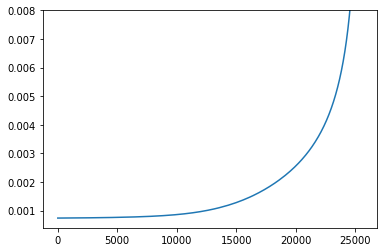

In [96]:
plt.plot(targets)
plt.ylim([4e-4,8e-3])

plt.show()

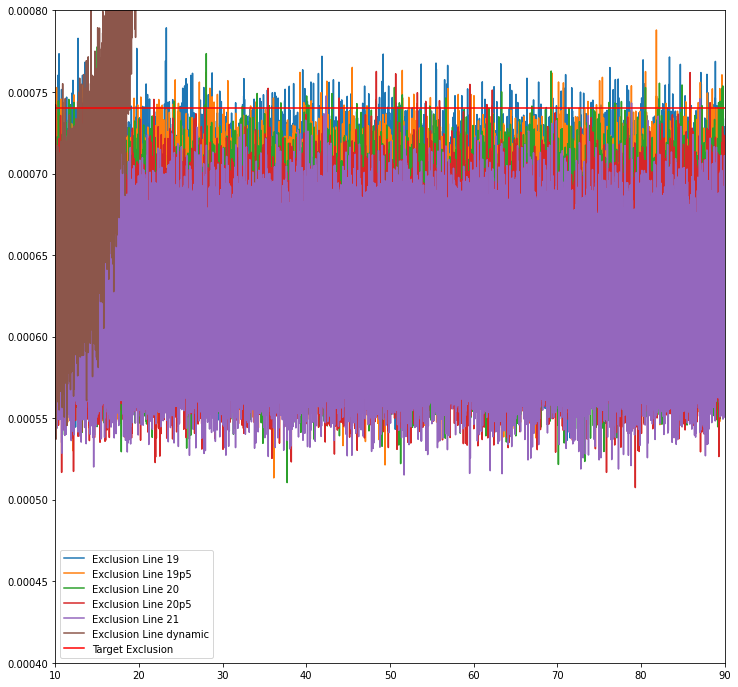

In [103]:
target = 7.4e-4

plt.figure(figsize=(12,12))

for key in runData.keys():
    label = f"Exclusion Line {key}"
    plt.plot(runData[key][-1][1], runData[key][-1][0], label=label)
    
plt.axhline(y=target, color="r", linestyle="-", label="Target Exclusion")

plt.ylim([4e-4,8e-4])
plt.xlim([10,90])


plt.legend()
plt.show()

In [12]:
print(len(runData['19'][-1][1][:-1]))
print(len(runData['19'][-1][1][1:]))

6288249
6288249


(1187.0, 1188.0)

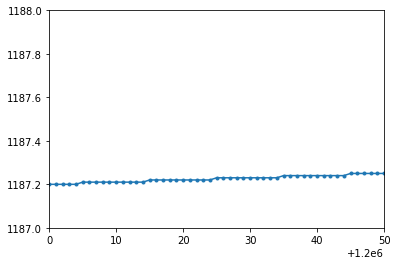

In [16]:
plt.plot(runData['19'][-1][1][:-1], marker='.')

plt.xlim([1.2e6, 1.20005e6])
plt.ylim([1.187e3, 1.188e3])

# Old

In [2]:
savePath = r'C:\Users\Lehnert Lab\Desktop\mexDynamicScanning\scanDir\save'

# Get a list of all .csv files in the "data" folder
metric_folder = savePath + r'\metrics'
metric_files = [f for f in os.listdir(metric_folder) if f.endswith(".csv")]

# Load data from each .csv file and store it in the data_arrays list
metric_arrays = []
for csv_file in metric_files:
    file_path = os.path.join(metric_folder, csv_file)
    data = np.loadtxt(file_path, delimiter=",")
    metric_arrays.append(data)


# Get a list of all .csv files in the "data" folder
data_folder = savePath + r'\data'
csv_files = [f for f in os.listdir(data_folder) if f.endswith(".csv")]

# Load data from each .csv file and store it in the data_arrays list
data_arrays = []
for csv_file in csv_files:
    file_path = os.path.join(data_folder, csv_file)
    data = np.loadtxt(file_path, delimiter=",")
    data_arrays.append(data)


print(metric_arrays)

[array(1900.), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900.]), array([1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900., 1900.,
       1900

In [20]:
final19 = np.loadtxt(os.path.join(data_folder, 'exclusionLine_2024-03-06_21-41-52.csv'), delimiter = ',')
first19p5 = np.loadtxt(os.path.join(data_folder, 'exclusionLine_2024-03-06_21-42-16.csv'), delimiter = ',')

In [24]:
len(final19[0])

291599

In [23]:
len(first19p5[0])

25599

In [27]:
split_data = []
foo = data_arrays[0]

for i in range(1, len(data_arrays)-1):
    if len(data_arrays[i-1][0]) > len(data_arrays[i][0]):
        split_data += [foo]
        foo = []
        
    foo = np.append(foo, [data_arrays[i]])

In [29]:
split_data

array([  0.   ,   0.   ,   0.   , ..., 278.797, 278.798, 278.799])

In [15]:
diff = len(data_arrays[1][0])

28359

In [14]:
len(data_arrays[-1][0])

291599

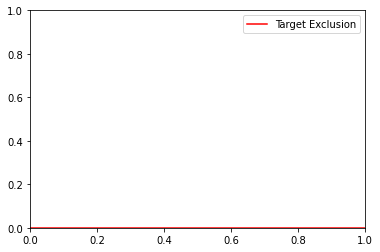

In [40]:
# Plot each data array in data_arrays
target = 4.2e-5
plt.figure()

for i, data in enumerate(data_arrays):
    label = f"Exclusion Line {i + 1}"
    plt.plot(data[1], data[0], label=label)
plt.axhline(y=target, color="r", linestyle="-", label="Target Exclusion")




plt.legend()
plt.show()